<h1>Video Games Sales Analysis</h1>
<h2>~A Data Analytics Project<h2> 
<h6>Dev Rajeshbhai Hathi   PES1UG21CS813</h6>
<h6>Harsha R Patil         PES1UG21CS812</h6>

In [82]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

pio.renderers.default='notebook+pdf'
pio.kaleido.scope.mathjax = None

In [83]:
#Importing the data
df=pd.read_csv("./vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [84]:
#Missing data analysis
print('Total Rows : ', df.shape[0], 'Total Columns : ', df.shape[1])

print('\nMissing Data Column Wise : ')
print(df.isnull().sum())

Total Rows :  16598 Total Columns :  11

Missing Data Column Wise : 
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


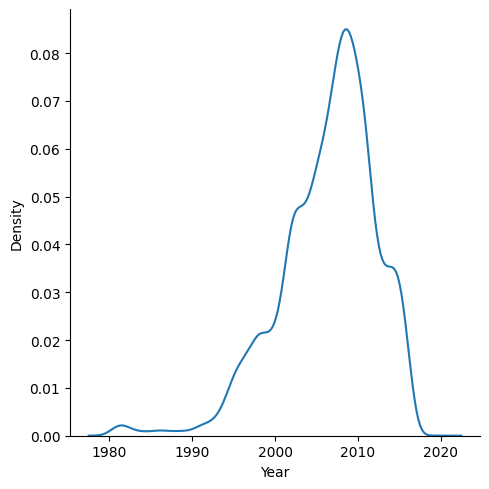

In [85]:
#Missing Year Values
sns.displot(df, x="Year", kind="kde")
plt.show()

### As we can see the distribution of Year is skewed, so it is best to impute the missing values with the **median**

In [86]:
#Imputing Year
df["Year"].fillna(df["Year"].median(),inplace = True)

### The Publisher column also has few missing values, but since it is a nominal data, we cannot impute it with any values, so we just drop those rows 

In [87]:
df["Publisher"].dropna(inplace = True)

## Now, Let us begin with our Exploratory Data Analysis

### 1. What are the top 10 games currently, making most sales all over the world?

In [88]:
games_sales = df.groupby("Name")[["Global_Sales"]].sum()
top_games = pd.DataFrame((games_sales.sort_values(by=['Global_Sales'], ascending=False).reset_index()))
top10_games = top_games.head(10)
top10_games_output = top10_games.style.format({
    "Global_Sales": "${:.2f}M"
}).hide(axis="index")

print(pd.DataFrame(display((top10_games_output))))


Name,Global_Sales
Wii Sports,$82.74M
Grand Theft Auto V,$55.92M
Super Mario Bros.,$45.31M
Tetris,$35.84M
Mario Kart Wii,$35.82M
Wii Sports Resort,$33.00M
Pokemon Red/Pokemon Blue,$31.37M
Call of Duty: Black Ops,$31.03M
Call of Duty: Modern Warfare 3,$30.83M
New Super Mario Bros.,$30.01M


Empty DataFrame
Columns: []
Index: []


#### We can make a pie chart for representing the top 10 globally selling games.

In [91]:
pie_chart = px.pie(top10_games, values=top10_games['Global_Sales'], names=top10_games['Name'],title='Top 10 globally selling games', color_discrete_sequence=px.colors.sequential.Agsunset)
pie_chart.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)
pie_chart.show()

### 2. Which region performed best in terms of overall sales?

In [ ]:
#Average sales can be seen to see the overall sales region wise

na = df['NA_Sales'].mean()*1000000
jp = df['JP_Sales'].mean()*1000000
eu = df['EU_Sales'].mean()*1000000
ot = df['Other_Sales'].mean()*1000000
gl = df['Global_Sales'].mean()*1000000

print('Average Sales in North America : ', f"${na:,.2f}")
print('Average Sales in Japan : ', f"${jp:,.2f}")
print('Average Sales in Europe : ', f"${eu:,.2f}")
print('Average Sales in Other Regions : ', f"${ot:,.2f}")
print('Average Sales Globally : ', f"${gl:,.2f}")

Average Sales in North America :  $264,667.43
Average Sales in Japan :  $77,781.66
Average Sales in Europe :  $146,652.01
Average Sales in Other Regions :  $48,063.02
Average Sales Globally :  $537,440.66


#### We can plot a bar chart to visualize the region wise sales

In [ ]:
bar_chart = go.Figure(data=[go.Bar(
    y=['Other','Japan','Europe','North America','Global'],
    x=[ot, jp, eu, na, gl],
    orientation='h',
)])
bar_chart.update_layout(title_text='Highest sales regions on average')
bar_chart.update_xaxes(title='Average Sales')
bar_chart.update_yaxes(title='Regions')

### 3. What are the best selling consoles?

In [ ]:
#For this analysis we'll group the individual sale with sales in specific region(s)

na_plat_sales = pd.DataFrame(df.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
na_plat_sales.rename(columns = {'Platform':'NA Platform'}, inplace = True)

eu_plat_sales = pd.DataFrame(df.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
eu_plat_sales.rename(columns = {'Platform':'EU Platform'}, inplace = True)

jp_plat_sales = pd.DataFrame(df.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
jp_plat_sales.rename(columns = {'Platform':'JP Platform'}, inplace = True)

ot_plat_sales = pd.DataFrame(df.groupby("Platform")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index())
ot_plat_sales.rename(columns = {'Platform':'Other Platform'}, inplace = True)

data=pd.concat([na_plat_sales,eu_plat_sales,jp_plat_sales,ot_plat_sales],axis=1)
data.head(3)

,NA Platform,NA_Sales,EU Platform,EU_Sales,JP Platform,JP_Sales,Other Platform,Other_Sales
0,X360,601.05,PS3,343.71,DS,175.57,PS2,193.44
1,PS2,583.84,PS2,339.29,PS,139.82,PS3,141.93
2,Wii,507.71,X360,280.58,PS2,139.20,X360,85.54


#### As we can see the output, it is a little difficult to analyze the result. So we can plot the result using line chart and visualize it better

In [ ]:

line_chart = make_subplots(rows=2, cols=2,subplot_titles=("NA Top Platforms","EU Top Platforms","JP Top Platforms","Other Regions Top Platforms"))

line_chart.add_trace(go.Bar(x=data['NA Platform'], y=data['NA_Sales'],
                    marker=dict(color=[1, 2, 3],
                                coloraxis="coloraxis")),1, 1)

line_chart.add_trace(go.Bar(x=data['EU Platform'], y=data['EU_Sales'],
                    marker=dict(color=[4, 5, 6], 
                                coloraxis="coloraxis")),1, 2)
                   
line_chart.add_trace(go.Bar(x=data['JP Platform'], y=data['JP_Sales'],
                    marker=dict(color=[7, 8, 9], 
                                coloraxis="coloraxis")),2, 1)

line_chart.add_trace(go.Bar(x=data['Other Platform'], y=data['Other_Sales'],
                    marker=dict(color=[10, 11, 12], 
                                coloraxis="coloraxis")),2, 2)
                   
line_chart.update_layout(coloraxis=dict(colorscale='agsunset'), showlegend=False)
line_chart.show()


### 4. What are the Top Selling Games in every region?

In [ ]:
na_top_games = pd.DataFrame(df.groupby("Name")['NA_Sales'].mean().sort_values(ascending=False).reset_index())
na_top_games.rename(columns = {'Name':'NA_Game'}, inplace = True)

eu_top_games = pd.DataFrame(df.groupby("Name")['EU_Sales'].mean().sort_values(ascending=False).reset_index())
eu_top_games.rename(columns = {'Name':'EU_Game'}, inplace = True)

jp_top_games = pd.DataFrame(df.groupby("Name")['JP_Sales'].mean().sort_values(ascending=False).reset_index())
jp_top_games.rename(columns = {'Name':'JP_Game'}, inplace = True)

ot_top_games = pd.DataFrame(df.groupby("Name")['Other_Sales'].mean().sort_values(ascending=False).reset_index())
ot_top_games.rename(columns = {'Name':'Other_Game'}, inplace = True)

top_games_df=pd.concat([na_top_games,eu_top_games,jp_top_games,ot_top_games],axis=1)

#### Visualization Of Top Selling Games

In [93]:
top_games_bar = make_subplots(rows=4, cols=1,subplot_titles=("North American top games","Europe top games", "Japan top games","Other regions top games"))

top_games_bar.add_trace(go.Bar(x=top_games_df['NA_Game'][:5], y=top_games_df['NA_Sales'][:5],marker=dict(color=[1, 2, 3],coloraxis="coloraxis")),1, 1)
top_games_bar.add_trace(go.Bar(x=top_games_df['EU_Game'][:5], y=top_games_df['EU_Sales'][:5],marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 1)
top_games_bar.add_trace(go.Bar(x=top_games_df['JP_Game'][:5], y=top_games_df['JP_Sales'][:5],marker=dict(color=[7, 8, 9], coloraxis="coloraxis")),3, 1)
top_games_bar.add_trace(go.Bar(x=top_games_df['Other_Game'][:5], y=top_games_df['Other_Sales'][:5],marker=dict(color=[10, 11, 12], coloraxis="coloraxis")),4, 1)

top_games_bar.update_xaxes(tickangle=45)
top_games_bar.update_layout(height=2500,width=900,coloraxis=dict(colorscale='agsunset'), showlegend=False)
top_games_bar.show()

### 5. What are the region wise top publishers?

In [ ]:
#We can group the data by publishers and different regions for analyzing, just like above
na_top_publishers = pd.DataFrame(df.groupby("Publisher")['NA_Sales'].mean().sort_values(ascending=False).reset_index())
na_top_publishers.rename(columns = {'Publisher':'NA_Publisher'}, inplace = True)

eu_top_publishers = pd.DataFrame(df.groupby("Publisher")['EU_Sales'].mean().sort_values(ascending=False).reset_index())
eu_top_publishers.rename(columns = {'Publisher':'EU_Publisher'}, inplace = True)

jp_top_publishers = pd.DataFrame(df.groupby("Publisher")['JP_Sales'].mean().sort_values(ascending=False).reset_index())
jp_top_publishers.rename(columns = {'Publisher':'JP_Publisher'}, inplace = True)

ot_top_publishers = pd.DataFrame(df.groupby("Publisher")['Other_Sales'].mean().sort_values(ascending=False).reset_index())
ot_top_publishers.rename(columns = {'Publisher':'Other_Publisher'}, inplace = True)

top_publishers_df=pd.concat([na_top_publishers,eu_top_publishers,jp_top_publishers,ot_top_publishers],axis=1)

#### We can visualise it just like top games region wise

In [ ]:
top_publishers_bar = make_subplots(rows=4, cols=1,subplot_titles=("North American top publishers","Europe top publishers", "Japan top publishers","Other regions top publishers"))

top_publishers_bar.add_trace(go.Bar(x=top_publishers_df['NA_Publisher'][:5], y=top_publishers_df['NA_Sales'][:5],marker=dict(color=[1, 2, 3],coloraxis="coloraxis")),1, 1)
top_publishers_bar.add_trace(go.Bar(x=top_publishers_df['EU_Publisher'][:5], y=top_publishers_df['EU_Sales'][:5],marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2,1)
top_publishers_bar.add_trace(go.Bar(x=top_publishers_df['JP_Publisher'][:5], y=top_publishers_df['JP_Sales'][:5],marker=dict(color=[7, 8, 9], coloraxis="coloraxis")),3,1)
top_publishers_bar.add_trace(go.Bar(x=top_publishers_df['Other_Publisher'][:5], y=top_publishers_df['Other_Sales'][:5],marker=dict(color=[10, 11, 12], coloraxis="coloraxis")),4,1)

top_publishers_bar.update_layout(height=2000,width=800,coloraxis=dict(colorscale='agsunset'), showlegend=False)
top_publishers_bar.show()

### 6. Games that are released before year 2000 and are making very high sales!

In [ ]:
bef_2000 = df.query("Year<2000")
bef_2000['Year'].shape

(1974,)

#### As we can see there are 1974 games that were released before 2000, so now games that are released before 2000 and are sold top 1% among all of them, are the one's we are targetting here, so we can find 99th percentile and games crossing those many global sales, are higher than 99 percentile games 

In [ ]:
bef_2000_99p = bef_2000['Global_Sales'].quantile(0.99)
print('99th Percentile : ',bef_2000_99p)

top_old_games = bef_2000.query(f"Global_Sales>{bef_2000_99p}")
top_old_games = top_old_games[["Name", "Genre", "Global_Sales"]] 

top_old_games_output = top_old_games.style.format({
    "Year": "{:,.0f}",
    "Global_Sales": "${:.2f}M"
}).hide(axis="index")

print(display(top_old_games_output))


99th Percentile :  7.823499999999999


Name,Genre,Global_Sales
Super Mario Bros.,Platform,$40.24M
Pokemon Red/Pokemon Blue,Role-Playing,$31.37M
Tetris,Puzzle,$30.26M
Duck Hunt,Shooter,$28.31M
Pokemon Gold/Pokemon Silver,Role-Playing,$23.10M
Super Mario World,Platform,$20.61M
Super Mario Land,Platform,$18.14M
Super Mario Bros. 3,Platform,$17.28M
Pokémon Yellow: Special Pikachu Edition,Role-Playing,$14.64M
Super Mario 64,Platform,$11.89M


None


### 7. What are the top genres that are dominating the sales in all the regions?

#### We will take a look at global sales for this analysis. Grouping the data by genre and analyzing the top genres among them 

In [ ]:
top_genres = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()
top_genres.style.format({
    "Global_Sales": "${:.2f}M"
}).hide(axis="index")


Genre,Global_Sales
Action,$1751.18M
Sports,$1330.93M
Shooter,$1037.37M
Role-Playing,$927.37M
Platform,$831.37M
Misc,$809.96M
Racing,$732.04M
Fighting,$448.91M
Simulation,$392.20M
Puzzle,$244.95M


#### For visualizing this data, we will use another bar chart and plot all the values shown above

In [ ]:
bar_chart_top_genres = px.bar(top_genres, x='Genre', y='Global_Sales',color='Global_Sales',color_continuous_scale='agsunset')
bar_chart_top_genres.show()